<a href="https://colab.research.google.com/github/brandon-setegn/data-mining-business-analytics/blob/master/west-roxbury-home-values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
%pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.7 MB/s eta 0:00:00


In [1]:
#let's import the libraries we are going to need
import os, csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/Development/machine_learning/dmba')

In [5]:
# Load Data
housing_df = pd.read_csv('WestRoxbury.csv')

In [29]:
housing_df

TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0           344.2  4330      9965      1880        2436         1352     2.0   
1           412.6  5190      6590      1945        3108         1976     2.0   
2           330.1  4152      7500      1890        2294         1371     2.0   
3           498.6  6272     13773      1957        5032         2608     1.0   
4           331.5  4170      5000      1910        2370         1438     2.0   
...           ...   ...       ...       ...         ...          ...     ...   
5797        404.8  5092      6762      1938        2594         1714     2.0   
5798        407.9  5131      9408      1950        2414         1333     2.0   
5799        406.5  5113      7198      1987        2480         1674     2.0   
5800        308.7  3883      6890      1946        2000         1000     1.0   
5801        447.6  5630      7406      1950        2510         1600     2.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  \
0         6       3.0          1          1        1          0            0   
1        10       4.0          2          1        1          0            0   
2         8       4.0          1          1        1          0            0   
3         9       5.0          1          1        1          1            0   
4         7       3.0          2          0        1          0            0   
...     ...       ...        ...        ...      ...        ...          ...   
5797      9       3.0          2          1        1          1            0   
5798      6       3.0          1          1        1          1            0   
5799      7       3.0          1          1        1          1            0   
5800      5       2.0          1          0        1          0            0   
5801      7       3.0          1          1        1          1            0   

      REMODEL_Recent  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  
...              ...  
5797               1  
5798               0  
5799               0  
5800               0  
5801               0  

[5802 rows x 15 columns]

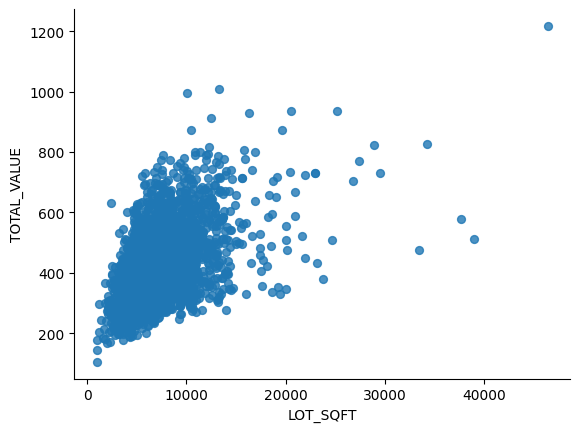

In [28]:
from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='LOT_SQFT', y='TOTAL_VALUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
housing_df.shape
housing_df.head()
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5802 non-null   float64
 1   TAX           5802 non-null   int64  
 2   LOT SQFT      5802 non-null   int64  
 3   YR BUILT      5802 non-null   int64  
 4   GROSS AREA    5802 non-null   int64  
 5   LIVING AREA   5802 non-null   int64  
 6   FLOORS        5802 non-null   float64
 7   ROOMS         5802 non-null   int64  
 8   BEDROOMS      5802 non-null   int64  
 9   FULL BATH     5802 non-null   int64  
 10  HALF BATH     5802 non-null   int64  
 11  KITCHEN       5802 non-null   int64  
 12  FIREPLACE     5802 non-null   int64  
 13  REMODEL       5802 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


In [8]:
# prompt: Using dataframe housing_df: find max total value by lot sqft, bucketing lot sqft into groups of 300

housing_df.groupby(pd.cut(housing_df['LOT SQFT '], 300)).agg({'TOTAL VALUE ': 'max'})


TOTAL VALUE 
LOT SQFT                          
(951.586, 1148.38]           176.9
(1148.38, 1299.76]           295.6
(1299.76, 1451.14]           244.2
(1451.14, 1602.52]             NaN
(1602.52, 1753.9]            213.4
...                            ...
(45654.1, 45805.48]            NaN
(45805.48, 45956.86]           NaN
(45956.86, 46108.24]           NaN
(46108.24, 46259.62]           NaN
(46259.62, 46411.0]         1217.8

[300 rows x 1 columns]

In [9]:
# Rename columns: replace spaces with '_' to allow dot notation
housing_df = housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'})
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns] #all columns

In [10]:
# Practice showing the first four rows of the data
housing_df.loc[0:3] # loc[a:b] gives rows a to b, inclusive

TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0        344.2  4330      9965      1880        2436         1352     2.0   
1        412.6  5190      6590      1945        3108         1976     2.0   
2        330.1  4152      7500      1890        2294         1371     2.0   
3        498.6  6272     13773      1957        5032         2608     1.0   

   ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
0      6         3          1          1        1          0    None  
1     10         4          2          1        1          0  Recent  
2      8         4          1          1        1          0    None  
3      9         5          1          1        1          1    None

In [11]:
housing_df.iloc[0:3] # iloc[a:b] gives rows a to b, exclusive (a to b-1)

TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0        344.2  4330      9965      1880        2436         1352     2.0   
1        412.6  5190      6590      1945        3108         1976     2.0   
2        330.1  4152      7500      1890        2294         1371     2.0   

   ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
0      6         3          1          1        1          0    None  
1     10         4          2          1        1          0  Recent  
2      8         4          1          1        1          0    None

**Sampling from a Database**

In [12]:
# random sample of 5 observations
housing_df.sample(5)

TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
3927        352.5  4434      4565      1963        2193         1326     2.0   
1323        300.1  3775      5675      1953        2614         1326     1.5   
5182        396.6  4989      7077      1930        2610         1590     2.0   
3593        410.6  5165      7462      1955        2422         1530     2.0   
37          296.5  3729      5683      1960        2982         1452     1.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
3927      8         3          1          1        1          1    None  
1323      6         2          1          1        1          1    None  
5182      6         3          1          0        1          1    None  
3593      6         3          1          1        1          1    None  
37        6         3          1          1        1          1    None

In [13]:
# oversample houses with over 10 rooms
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]
housing_df.sample(5, weights=weights)

TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
2199        623.5  7843      9875      1910        5653         3184     2.0   
5285        427.8  5381      4989      1947        2678         1539     2.0   
4627        529.4  6659      6783      1930        3071         1728     2.0   
3858        673.7  8475     11808      1918        5641         3120     2.0   
5309        284.4  3577      6242      1950        2065         1001     1.0   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE REMODEL  
2199     11         5          1          1        1          2    None  
5285      6         3          1          1        1          1    None  
4627      7         3          1          1        1          1    None  
3858     12         6          3          1        1          2    None  
5309      5         2          1          0        1          1    None

In [14]:
# REMODEL needs to be converted to a categorical variable
housing_df.REMODEL = housing_df.REMODEL.astype('category')
print(housing_df.REMODEL.cat.categories)
housing_df.REMODEL.dtype

Index(['None', 'Old', 'Recent'], dtype='object')


CategoricalDtype(categories=['None', 'Old', 'Recent'], ordered=False)

In [15]:
# use drop_first=TRUE to drop the first dummy variable
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)
print(housing_df.columns)
housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5)

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')


REMODEL_Old  REMODEL_Recent
0            0               0
1            0               1
2            0               0
3            0               0
4            0               0

# Missing Data

In [16]:
# To illustrate missing data procedures, we first convert a few entries for bedrooms to NA's.  Then we impute these missing values using the median of the ramining values.
missingRows = housing_df.sample(10)
housing_df.loc[missingRows.index, 'BEDROOMS'] = np.nan
housing_df.loc[missingRows.index, 'BEDROOMS']

3721   NaN
3840   NaN
4336   NaN
4268   NaN
1726   NaN
3782   NaN
5294   NaN
435    NaN
1613   NaN
5168   NaN
Name: BEDROOMS, dtype: float64

In [17]:
# Remove rows with missing values
reduced_df = housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


In [18]:
# Replace the missing values using the median of the remaining values
medianBedrooms = housing_df.BEDROOMS.median()
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(medianBedrooms)
print('Number of rows with valid BEDROOMS vlaues after filling NA values: ', housing_df['BEDROOMS'].count())


Number of rows with valid BEDROOMS vlaues after filling NA values:  5802


# Normalizing and Rescaling Data

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = housing_df.copy()
df.head()

TOTAL_VALUE   TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0        344.2  4330      9965      1880        2436         1352     2.0   
1        412.6  5190      6590      1945        3108         1976     2.0   
2        330.1  4152      7500      1890        2294         1371     2.0   
3        498.6  6272     13773      1957        5032         2608     1.0   
4        331.5  4170      5000      1910        2370         1438     2.0   

   ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  \
0      6       3.0          1          1        1          0            0   
1     10       4.0          2          1        1          0            0   
2      8       4.0          1          1        1          0            0   
3      9       5.0          1          1        1          1            0   
4      7       3.0          2          0        1          0            0   

   REMODEL_Recent  
0               0  
1               1  
2               0  
3               0  
4               0

In [20]:
# Normalizing Data
# pandas:
norm_df = (housing_df - housing_df.mean()) / housing_df.std()
norm_df.head()

TOTAL_VALUE       TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  \
0    -0.488879 -0.488507  1.381019 -1.576690   -0.552998    -0.564458   
1     0.200795  0.200789  0.116835  0.229372    0.207196     0.590121   
2    -0.631048 -0.631176  0.457697 -1.298834   -0.713635    -0.529303   
3     1.067927  1.068020  2.807392  0.562799    2.383704     1.759502   
4    -0.616932 -0.616749 -0.478735 -0.743123   -0.627660    -0.405334   

     FLOORS     ROOMS  BEDROOMS  FULL_BATH  HALF_BATH   KITCHEN  FIREPLACE  \
0  0.710905 -0.691980 -0.272045  -0.568528   0.723202 -0.124803  -1.309337   
1  0.710905  2.090325  0.910279   1.347035   0.723202 -0.124803  -1.309337   
2  0.710905  0.699173  0.910279  -0.568528   0.723202 -0.124803  -1.309337   
3 -1.536872  1.394749  2.092603  -0.568528   0.723202 -0.124803   0.460235   
4  0.710905  0.003597 -0.272045   1.347035  -1.150021 -0.124803  -1.309337   

   REMODEL_Old  REMODEL_Recent  
0     -0.33356       -0.421381  
1     -0.33356        2.372738  
2     -0.33356       -0.421381  
3     -0.33356       -0.421381  
4     -0.33356       -0.421381

In [21]:
# scikit-learn
scaler = StandardScaler()
# the result of the transformation is a numpy array, we convert it to a datafram
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), index=housing_df.index, columns=housing_df.columns)
norm_df.head()

TOTAL_VALUE       TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  \
0    -0.488921 -0.488550  1.381138 -1.576825   -0.553046    -0.564507   
1     0.200812  0.200806  0.116845  0.229392    0.207214     0.590172   
2    -0.631102 -0.631230  0.457736 -1.298946   -0.713696    -0.529349   
3     1.068020  1.068112  2.807634  0.562847    2.383909     1.759654   
4    -0.616985 -0.616802 -0.478777 -0.743187   -0.627714    -0.405369   

     FLOORS     ROOMS  BEDROOMS  FULL_BATH  HALF_BATH   KITCHEN  FIREPLACE  \
0  0.710966 -0.692039 -0.272068  -0.568577   0.723264 -0.124814  -1.309450   
1  0.710966  2.090505  0.910358   1.347151   0.723264 -0.124814  -1.309450   
2  0.710966  0.699233  0.910358  -0.568577   0.723264 -0.124814  -1.309450   
3 -1.537005  1.394869  2.092784  -0.568577   0.723264 -0.124814   0.460275   
4  0.710966  0.003597 -0.272068   1.347151  -1.150120 -0.124814  -1.309450   

   REMODEL_Old  REMODEL_Recent  
0    -0.333589       -0.421418  
1    -0.333589        2.372943  
2    -0.333589       -0.421418  
3    -0.333589       -0.421418  
4    -0.333589       -0.421418

In [22]:
# Rescaling a data frame

# pandas
norm_df = (housing_df - housing_df.min()) / (housing_df.max() - housing_df.min())
norm_df.head()

TOTAL_VALUE       TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0     0.214953  0.215015  0.197472  0.934858    0.220237     0.177220     0.5   
1     0.276420  0.276448  0.123156  0.967181    0.311878     0.307628     0.5   
2     0.202283  0.202300  0.143194  0.939831    0.200873     0.181191     0.5   
3     0.353702  0.353740  0.281323  0.973148    0.574253     0.439707     0.0   
4     0.203541  0.203586  0.088145  0.949776    0.211237     0.195193     0.5   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  \
0  0.272727     0.250       0.00   0.333333      0.0       0.00          0.0   
1  0.636364     0.375       0.25   0.333333      0.0       0.00          0.0   
2  0.454545     0.375       0.00   0.333333      0.0       0.00          0.0   
3  0.545455     0.500       0.00   0.333333      0.0       0.25          0.0   
4  0.363636     0.250       0.25   0.000000      0.0       0.00          0.0   

   REMODEL_Recent  
0             0.0  
1             1.0  
2             0.0  
3             0.0  
4             0.0

In [23]:
# scikit-learn:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(housing_df), index=housing_df.index, columns=housing_df.columns)
norm_df.head()

TOTAL_VALUE       TAX  LOT_SQFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  \
0     0.214953  0.215015  0.197472  0.934858    0.220237     0.177220     0.5   
1     0.276420  0.276448  0.123156  0.967181    0.311878     0.307628     0.5   
2     0.202283  0.202300  0.143194  0.939831    0.200873     0.181191     0.5   
3     0.353702  0.353740  0.281323  0.973148    0.574253     0.439707     0.0   
4     0.203541  0.203586  0.088145  0.949776    0.211237     0.195193     0.5   

      ROOMS  BEDROOMS  FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  \
0  0.272727     0.250       0.00   0.333333      0.0       0.00          0.0   
1  0.636364     0.375       0.25   0.333333      0.0       0.00          0.0   
2  0.454545     0.375       0.00   0.333333      0.0       0.00          0.0   
3  0.545455     0.500       0.00   0.333333      0.0       0.25          0.0   
4  0.363636     0.250       0.25   0.000000      0.0       0.00          0.0   

   REMODEL_Recent  
0             0.0  
1             1.0  
2             0.0  
3             0.0  
4             0.0

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TOTAL_VALUE'].plot(kind='hist', bins=20, title='TOTAL_VALUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TAX'].plot(kind='hist', bins=20, title='TAX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LOT_SQFT'].plot(kind='hist', bins=20, title='LOT_SQFT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='TOTAL_VALUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TOTAL_VALUE', y='TAX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='TAX', y='LOT_SQFT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='LOT_SQFT', y='YR_BUILT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TOTAL_VALUE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TOTAL_VALUE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['TAX']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('TAX')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['LOT_SQFT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('LOT_SQFT')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['YR_BUILT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('YR_BUILT')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['TOTAL_VALUE'].plot(kind='line', figsize=(8, 4), title='TOTAL_VALUE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['TAX'].plot(kind='line', figsize=(8, 4), title='TAX')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['LOT_SQFT'].plot(kind='line', figsize=(8, 4), title='LOT_SQFT')
plt.gca().spines[['top', 'right']].set_visible(False)

## Data Partitioning

In [25]:
# random_state is set to a defined value to get the same partitions when re-running the code
# training (60%) and validation (40%)
trainData, validData = train_test_split(housing_df, test_size=0.4, random_state=1)

print('Training:   ', trainData.shape)
print('Validation: ', validData.shape)

# Training (50%), validation (30%), and test (20%)
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)

print()
print('Training:   ', trainData.shape)
print('Validation: ', validData.shape)
print('Test:       ', testData.shape)

Training:    (3481, 15)
Validation:  (2321, 15)

Training:    (2901, 15)
Validation:  (1740, 15)
Test:        (1161, 15)


# Building a Predictive Model
The goal of this model is to predict home values in West Roxbury for new records.

In [32]:
# Data loading and preprocessing
housing_df = pd.read_csv('WestRoxbury.csv')
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns] #all columns

# Use drop_first=TRUE to drop the first dummy variable
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

# Create list of predictors and coutcome
excludeColumns = ('TOTAL_VALUE', 'TAX')
predictors = [s for s in housing_df.columns if s not in excludeColumns]
outcome = 'TOTAL_VALUE'

# Partition Data
x = housing_df[predictors]
y = housing_df[outcome]

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)

train_pred = model.predict(train_x)
train_results = pd.DataFrame({
    'TOTAL_VALUE': train_y,
    'predicted': train_pred,
    'residual': train_y - train_pred
  })
train_results.head()


TOTAL_VALUE   predicted   residual
2024        392.0  387.726258   4.273742
5140        476.3  430.785540  45.514460
5259        367.4  384.042952 -16.642952
421         350.3  369.005551 -18.705551
1401        348.1  314.725722  33.374278

In [ ]:
# Import utility function regerssionSummary
from dmba